In [1]:
pip install plotly
pip install ipykernel

SyntaxError: invalid syntax (2706534656.py, line 1)

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
import numpy as np
from matplotlib.cm import ScalarMappable
import zipfile
from matplotlib.colors import Normalize


In [10]:
zip_file_path = 'youtube_data.zip'


dataframes = []
def extract_and_load_data(zip_path):
    global dataframes
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # List all files in the zip archive
        file_names = zip_ref.namelist()
        print(f"Files in the zip archive: {file_names}")

        # Read and load each text file into a DataFrame
        for file_name in file_names:
            # print(file_name)
            if file_name.endswith('.txt'):
                print(file_name)
                
                with zip_ref.open(file_name) as file:
                    try:
                        df = pd.read_csv(file, sep='\t', header=None)
                        if len(df.columns) in [9, 29]:  # Expecting either 9 or 29 columns
                            dataframes.append(df)
                        else:
                            print(f"Ignoring file '{file_name}': Expected 9 or 29 columns, found {len(df.columns)} columns")
                    except pd.errors.ParserError as e:
                        print(f"Error parsing '{file_name}': {e}")

# Call the function to load data
extract_and_load_data(zip_file_path)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

print_combined = print(len(combined_df))

display(combined_df.head())

Files in the zip archive: ['youtube_data/', 'youtube_data/txt_23_0.txt', 'youtube_data/txt_23_1.txt', 'youtube_data/txt_23_2.txt', 'youtube_data/txt_17_0.txt', 'youtube_data/txt_17_1.txt', 'youtube_data/txt_17_2.txt', 'youtube_data/txt_17_3.txt', 'youtube_data/txt_19_0.txt', 'youtube_data/txt_19_1.txt', 'youtube_data/txt_19_2.txt', 'youtube_data/txt_19_3.txt', 'youtube_data/txt_21_0.txt', 'youtube_data/txt_21_1.txt', 'youtube_data/txt_21_2.txt', 'youtube_data/txt_21_3.txt', 'youtube_data/txt_23_3.txt']
youtube_data/txt_23_0.txt
youtube_data/txt_23_1.txt
Error parsing 'youtube_data/txt_23_1.txt': Error tokenizing data. C error: Expected 9 fields in line 4, saw 29

youtube_data/txt_23_2.txt
Error parsing 'youtube_data/txt_23_2.txt': Error tokenizing data. C error: Expected 9 fields in line 2, saw 29

youtube_data/txt_17_0.txt
youtube_data/txt_17_1.txt
youtube_data/txt_17_2.txt
youtube_data/txt_17_3.txt
Error parsing 'youtube_data/txt_17_3.txt': Error tokenizing data. C error: Expected 9 

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,6L_083s1CZs,AndrewBravener,1253.0,Comedy,202.0,7517.0,4.89,507.0,505.0,Y6c3emqC6aw,...,ghKp5DnWYQ4,3aB_k-r8Phk,k0Qpc4UzP9g,aXi4Gt2qDmA,nBT5hda29z4,j7YTwYem9RE,EPXEFmAWr-I,xyBhAglWZ9Q,XWI3gpRQpbo,r7MOce784jQ
1,1d2hEpG15_U,78k7,1253.0,Film & Animation,9.0,588.0,5.00,5.0,460.0,1kQjbul8v9s,...,NxCFGgP51rE,ialD5LAHnAU,k-6qTqoKDUM,w-I9IfovbE4,Gexg74VxcqA,boONKRUFoDE,bBeBsWE0AsE,eI7rCiu_81M,_cGbHX-Awho,6nXIZT2q8cw
2,4OTt3KTHKjQ,jeyyounit11,1253.0,Entertainment,395.0,2823.0,4.43,60.0,387.0,0FcpdC7j2oE,...,dNJVfMKhVxw,5OJOHXqkXCo,l7eED1c7WU4,4ok-aZIeo28,0F_Xah11gH0,QirLvas1CxU,_mktFOu2ux4,7uSfHNKWqyc,kCMecqz6soI,zGZ_pJQ-_EU
3,8k5Xr7RXMu8,FlippyCat,1253.0,Entertainment,72.0,7276.0,4.94,824.0,317.0,LqiAKiGJcZ8,...,jszXeTISLRA,9GAZZBRV7qY,JlDZiedo3pA,FNeY6KLOynw,7gohjnor-4w,qSaiob6v2jo,zkwUIgM8JTY,pkZ4wPMrwaE,btXCXYj1mtU,HqeztaT0eU0
4,-AcH55MPJUE,davidspates,1253.0,Comedy,138.0,4661.0,4.94,390.0,302.0,Xet_cgYuUW8,...,-udXWPxw4yI,KGr4XJ7zLng,nEXjqIvpRGg,Fx6UuknRJA4,8UvrSoohJs0,M2bX2SJcq68,0UvKL0CYPFA,AtugYg42mmc,fMYnImhpU68,SAHsbqXUoIE


In [11]:

#Null values
null_values = combined_df.isnull().sum()


# Display null values
print("Null Values in Each Column:")
print(null_values)



Null Values in Each Column:
0        0
1       27
2       27
3       27
4       27
5       27
6       27
7       27
8       27
9     4349
10    4350
11    4350
12    4351
13    4351
14    4351
15    4351
16    4351
17    4352
18    4354
19    4356
20    4356
21    4356
22    4357
23    4363
24    4364
25    4367
26    4370
27    4379
28    4434
dtype: int64


In [12]:
# Numerical and non-numerical meta information columns
numerical_meta_columns = combined_df.columns[[2, 4, 5, 6, 7, 8]]  #  numerical columns
non_numerical_meta_columns = combined_df.columns[[1, 3]]  # non-numerical columns

# Remove rows where all meta information columns are null
meta_columns = combined_df.columns[1:9]
cleaned_df = combined_df.dropna(subset=meta_columns, how='all')

# Fill null values in numerical meta information columns with the mean
cleaned_df[numerical_meta_columns] = cleaned_df[numerical_meta_columns].fillna(cleaned_df[numerical_meta_columns].mean())

# Fill null values in non-numerical meta information columns with 'unknown'
cleaned_df[non_numerical_meta_columns] = cleaned_df[non_numerical_meta_columns].fillna('unknown')

# Fill null values in related video ID columns with 'unknown'
related_video_columns = combined_df.columns[9:]
cleaned_df[related_video_columns] = cleaned_df[related_video_columns].fillna('unknown')

# Verify the cleaning process
print("Null Values after Cleaning:")
print(cleaned_df.isnull().sum())
print(len(cleaned_df))

Null Values after Cleaning:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
dtype: int64
11097


C:\Users\User\AppData\Local\Temp\ipykernel_32148\4294494295.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numerical_meta_columns] = cleaned_df[numerical_meta_columns].fillna(cleaned_df[numerical_meta_columns].mean())
C:\Users\User\AppData\Local\Temp\ipykernel_32148\4294494295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[non_numerical_meta_columns] = cleaned_df[non_numerical_meta_columns].fillna('unknown')
C:\Users\User\AppData\Local\Temp\ipykernel_32148\4294494295.py:17:

In [13]:
# Step 1: Construct Undirected Graph with all sources-edges
def construct_graph(data):
    G = nx.Graph()
    for index, row in data.iterrows():
        video_id = row[0]
        related_videos = row[9:]  # Assuming related videos start from column index 9
        for related_video in related_videos:
            if related_video != 'unknown':
                G.add_edge(video_id, related_video)
    return G

# Step 2: Pruning the graph
def prune_graph(G, meta_info):
    G_pruned = G.subgraph(meta_info).copy()  # Create a copy to allow modifications
    return G_pruned

# Step 3: Remove nodes with no edges
def remove_isolated_nodes(G):
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)
    return G

# Construct the graph
G = construct_graph(cleaned_df)
print("Step 1: Original Graph - Nodes:", len(G.nodes()), "Edges:", len(G.edges()))

# Step 2: Pruning the graph based on meta information (columns 1 to 8)
meta_info = cleaned_df.iloc[:, 0].tolist()  # Assuming the first column contains video IDs
G_pruned = prune_graph(G, meta_info)
print("Step 2: Subgraph Meta info Graph - Nodes:", len(G_pruned.nodes()), "Edges:", len(G_pruned.edges()))

# Step 3: Remove nodes with no edges
G_pruned = remove_isolated_nodes(G_pruned)
print("Step 3: Pruned Graph after removing isolated nodes - Nodes:", len(G_pruned.nodes()), "Edges:", len(G_pruned.edges()))

Step 1: Original Graph - Nodes: 91692 Edges: 129190
Step 2: Subgraph Meta info Graph - Nodes: 10957 Edges: 25690
Step 3: Pruned Graph after removing isolated nodes - Nodes: 10687 Edges: 25690


##Degree Distribution##

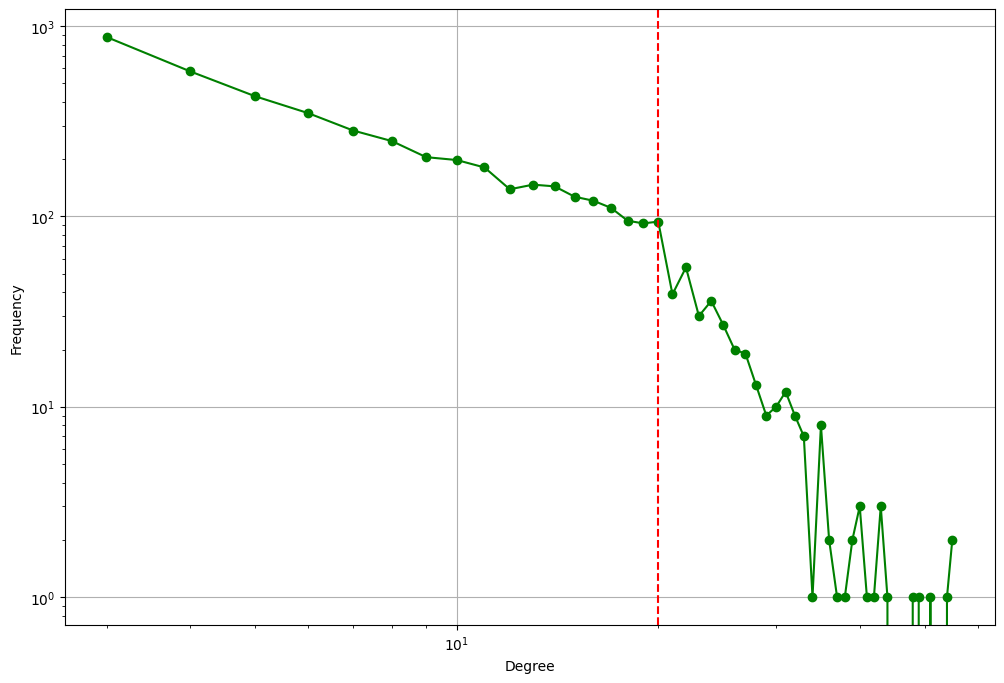

In [14]:
# Histogram for degree distribution
degree_freq = nx.degree_histogram(G_pruned)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.loglog(degrees[3:], degree_freq[3:],'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
# Add horizontal red line at x=20
plt.axvline(x=20, color='red', linestyle='--')
plt.grid(True)
plt.savefig("Degree_Distribution.jpg")
plt.show()



##Centrality##

In [15]:
# Function to estimate betweenness centrality
def estimate_betweenness_centrality(G, num_samples=100):
    betweenness_centrality = {node: 0 for node in G.nodes()}

    for _ in range(num_samples):
        # Randomly select a node as the source
        source = random.choice(list(G.nodes()))

        # Use networkx's single-source shortest path algorithm to calculate shortest paths from the source
        shortest_paths = nx.single_source_shortest_path(G, source)

        # Increment betweenness centrality for nodes that appear in the shortest paths
        for paths in shortest_paths.values():
            for node in paths:
                if node != source:  # Exclude the source node itself
                    betweenness_centrality[node] += 1

    # Normalize betweenness_centrality by dividing by the number of samples
    for node in G.nodes():
        betweenness_centrality[node] /= num_samples

    return betweenness_centrality

# Example
betweenness_centrality = estimate_betweenness_centrality(G_pruned)

In [19]:
# Create numeric labels for nodes
numeric_labels = {node: i for i, node in enumerate(G_pruned.nodes())}

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_pruned)

# Plot the graph with node colors based on betweenness centrality
pos = nx.spring_layout(G_pruned)  # Layout for the graph visualization
node_color = [betweenness_centrality[node] for node in G_pruned.nodes()]  # Node colors based on betweenness centrality

plt.figure(figsize=(12, 8))
nodes = nx.draw(G_pruned, pos, node_color=node_color, cmap=plt.cm.Blues, with_labels=True, labels=numeric_labels, node_size=100, font_size=8)

# Create a ScalarMappable object for colorbar
norm = Normalize(vmin=min(node_color), vmax=max(node_color))
sm = ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array(node_color)  # Set the array for ScalarMappable

# Add colorbar
plt.colorbar(sm, label='Betweenness Centrality')

plt.title('Graph with Node Colors based on Betweenness Centrality')
plt.savefig('Bet_Cen.jpg')
plt.show()

NameError: name 'Normalize' is not defined

Error in callback <function flush_figures at 0x000001F5B6FC1790> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [20]:
# Closeness Centrality
def estimate_closeness_centrality(G, sample_size=100):
    nodes = list(G.nodes())
    sampled_nodes = random.sample(nodes, sample_size)

    closeness_centrality = {node: 0 for node in nodes}

    for node in sampled_nodes:
        shortest_paths = nx.single_source_shortest_path_length(G, node)
        for target, length in shortest_paths.items():
            if length > 0:
                closeness_centrality[target] += 1 / length

    # Normalize by sample size
    for node in nodes:
        closeness_centrality[node] /= sample_size

    return closeness_centrality

# Estimate closeness centrality
closeness_centrality_approx = estimate_closeness_centrality(G_pruned, sample_size=100)

<ipython-input-59-fa4f7e8f84e0>:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Closeness Centrality (Approx)')


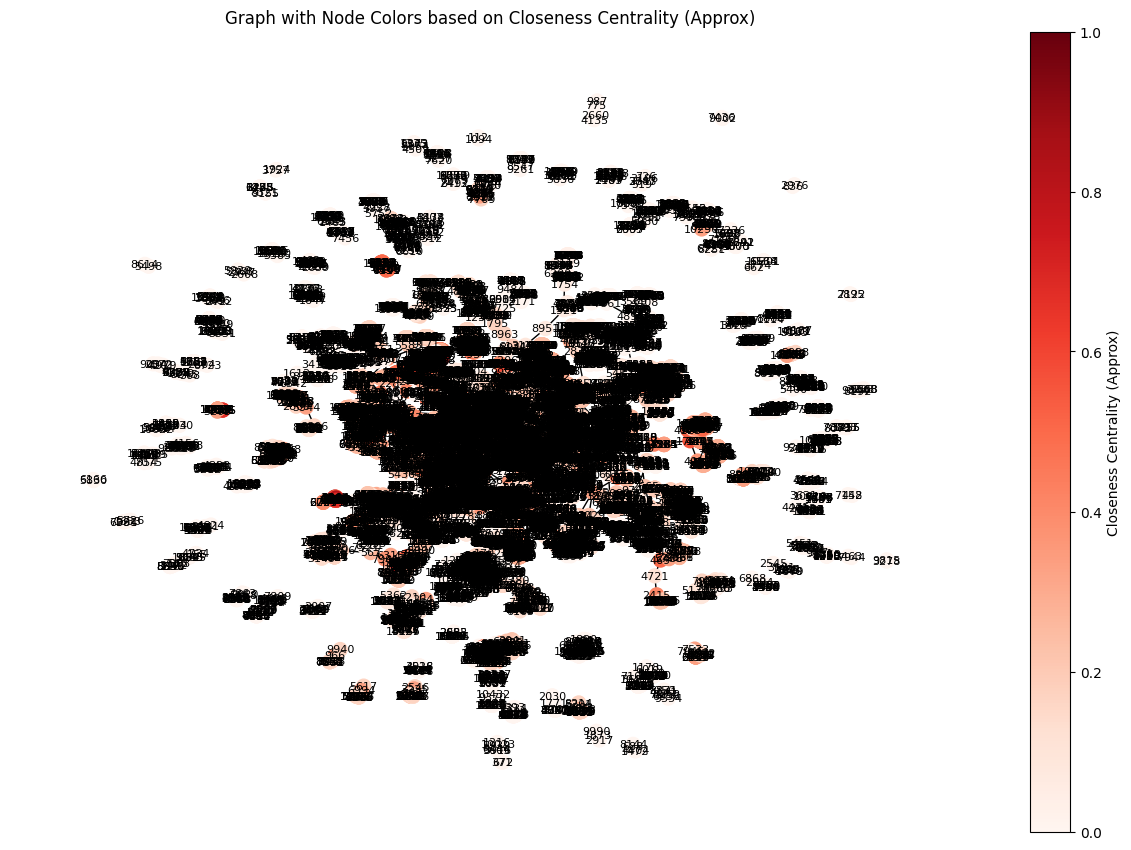

In [ ]:

# Create numeric labels for nodes
numeric_labels = {node: i for i, node in enumerate(G_pruned.nodes())}

# Generate positions for nodes
pos = nx.spring_layout(G_pruned)

# Plot the graph with node colors based on closeness centrality
node_color = [closeness_centrality_approx[node] for node in G_pruned.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(G_pruned, pos, node_color=node_color, cmap=plt.cm.Reds, with_labels=True, labels=numeric_labels, node_size=100, font_size=8)

# Create a ScalarMappable object for colorbar
sm = ScalarMappable(cmap=plt.cm.Reds)
sm.set_array([])  # Dummy array for ScalarMappable

# Add colorbar
plt.colorbar(sm, label='Closeness Centrality (Approx)')

plt.title('Graph with Node Colors based on Closeness Centrality (Approx)')
plt.savefig('Cl_cen.jpg')
plt.show()

<ipython-input-60-e0d16688537c>:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Degree Centrality')


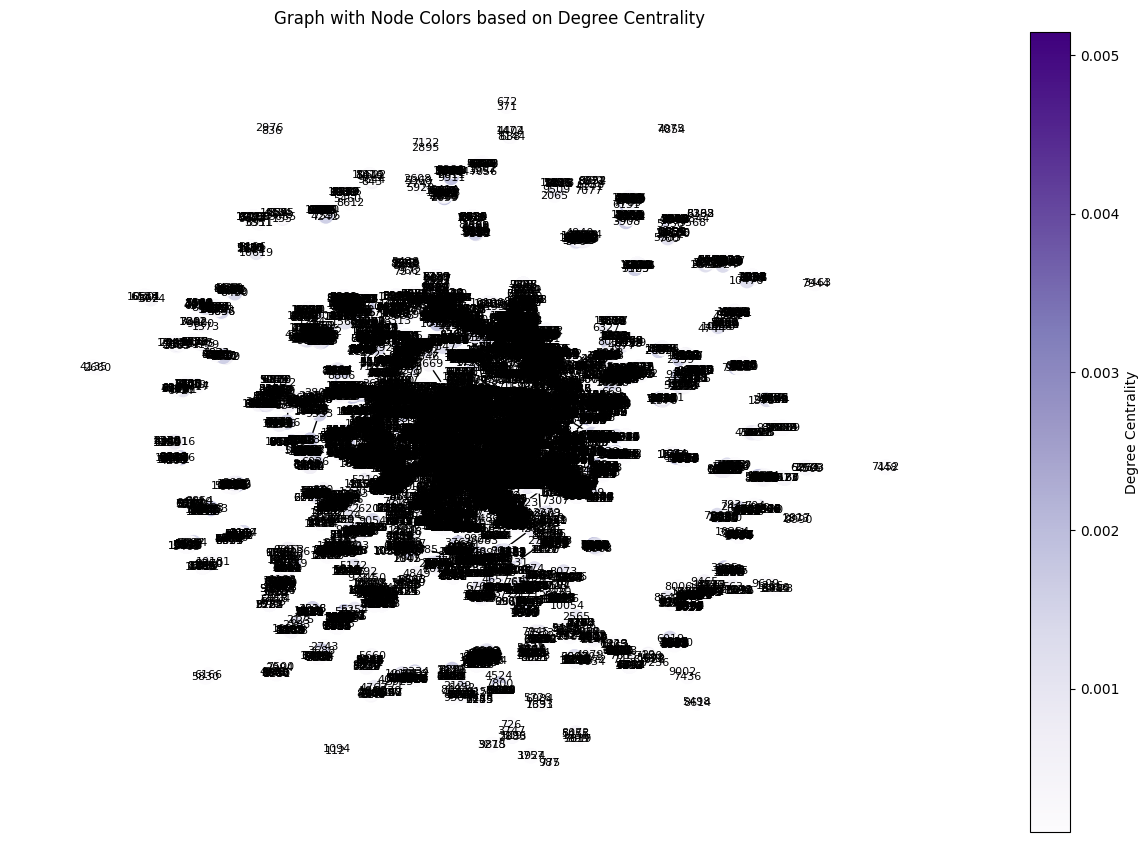

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G_pruned)

# Create numeric labels for nodes
numeric_labels = {node: i for i, node in enumerate(G_pruned.nodes())}

# Generate positions for nodes
pos = nx.spring_layout(G_pruned)

# Plot the graph with node colors based on degree centrality
node_color = [degree_centrality[node] for node in G_pruned.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(G_pruned, pos, node_color=node_color, cmap=plt.cm.Purples, with_labels=True, labels=numeric_labels, node_size=100, font_size=8)

# Create a ScalarMappable object for colorbar
sm = ScalarMappable(cmap=plt.cm.Purples, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])  # Dummy array for ScalarMappable

# Add colorbar
plt.colorbar(sm, label='Degree Centrality')

plt.title('Graph with Node Colors based on Degree Centrality')
plt.savefig('D_cen.jpg')
plt.show()

##Inside the Density using a Sample##

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

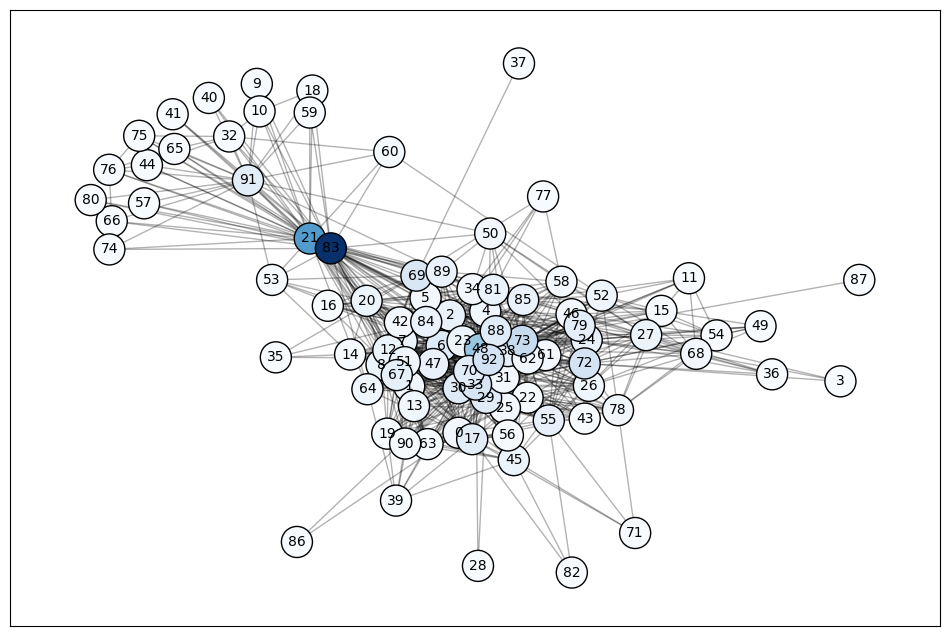

In [36]:
# Function to create a dense sample of the graph
def dense_sample_graph(G, sample_size=2000):
    # Get the nodes sorted by degree (high to low)
    high_degree_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)

    # Start with the highest-degree node
    start_node = high_degree_nodes[0][0]

    # Perform BFS to get a dense subgraph
    bfs_nodes = list(nx.bfs_tree(G, start_node).nodes())[:sample_size]
    G_sample = G.subgraph(bfs_nodes).copy()

    return G_sample

# Create a dense sample of the graph
G_sample = dense_sample_graph(G_pruned, sample_size=2000)

# Calculate centrality measures
betweenness_centrality = nx.betweenness_centrality(G_sample)
closeness_centrality = nx.closeness_centrality(G_sample)
degree_centrality = nx.degree_centrality(G_sample)

# Create a mapping from original node labels to numeric labels
node_mapping = {node: idx for idx, node in enumerate(G_sample.nodes())}
G_sample = nx.relabel_nodes(G_sample, node_mapping)
betweenness_centrality = {node_mapping[node]: bc for node, bc in betweenness_centrality.items()}
closeness_centrality = {node_mapping[node]: cc for node, cc in closeness_centrality.items()}
degree_centrality = {node_mapping[node]: dc for node, dc in degree_centrality.items()}

# Function to draw the graph
def draw_graph_centrality(G, pos, centrality, title, cmap):
    plt.figure(figsize=(12, 8))
    nodes = nx.draw_networkx_nodes(G, pos, node_color=list(centrality.values()), cmap=cmap, node_size=500, edgecolors='black')
    edges = nx.draw_networkx_edges(G, pos, alpha=0.3)
    labels = nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    sm = ScalarMappable(cmap=cmap)
    sm.set_array([])  # Dummy array for ScalarMappable

    plt.colorbar(sm, label=title)
    plt.title(f"Dense Sampled Graph with Node Colors based on {title}")
    plt.axis('off')
    plt.show()



ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

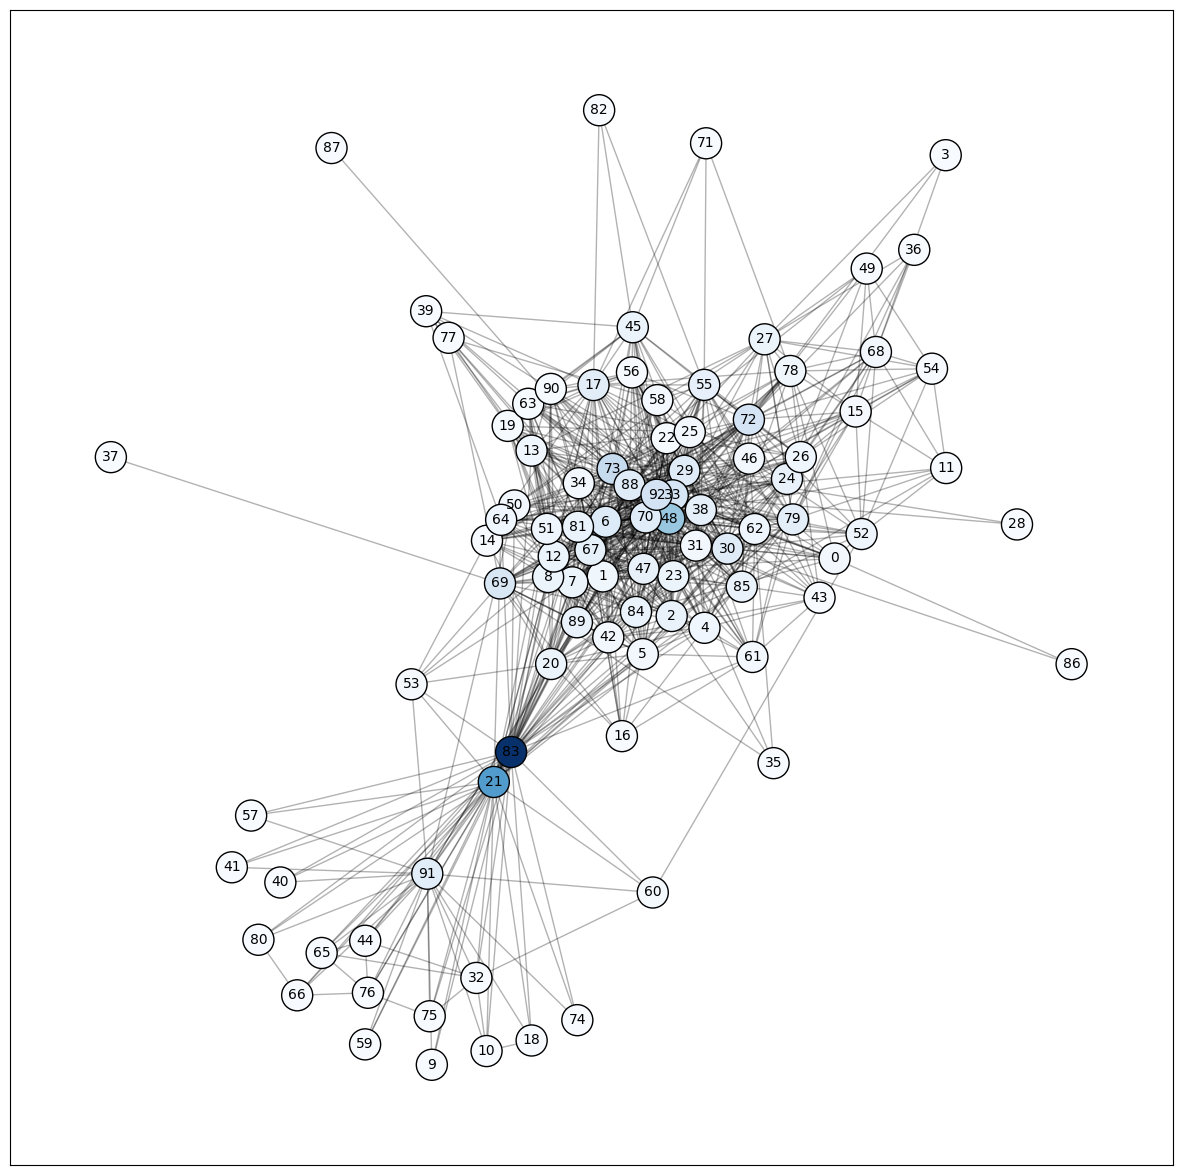

In [33]:
# Plot the graph with node colors based on betweenness centrality
pos = nx.spring_layout(G_sample)

plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_sample, pos, node_color=list(betweenness_centrality.values()), cmap=plt.cm.Blues, node_size=500, edgecolors='black')
edges = nx.draw_networkx_edges(G_sample, pos, alpha=0.3)
labels = nx.draw_networkx_labels(G_sample, pos, font_size=10, font_color="black")

sm = ScalarMappable(cmap=plt.cm.Blues)
sm.set_array([])  # Dummy array for ScalarMappable

plt.colorbar(sm, label="Betweenness Centrality")
plt.title("Dense Sampled Graph with Node Colors based on Betweenness Centrality")
plt.axis('off')
plt.savefig('Sample_Bet_Centrality.jpg')
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

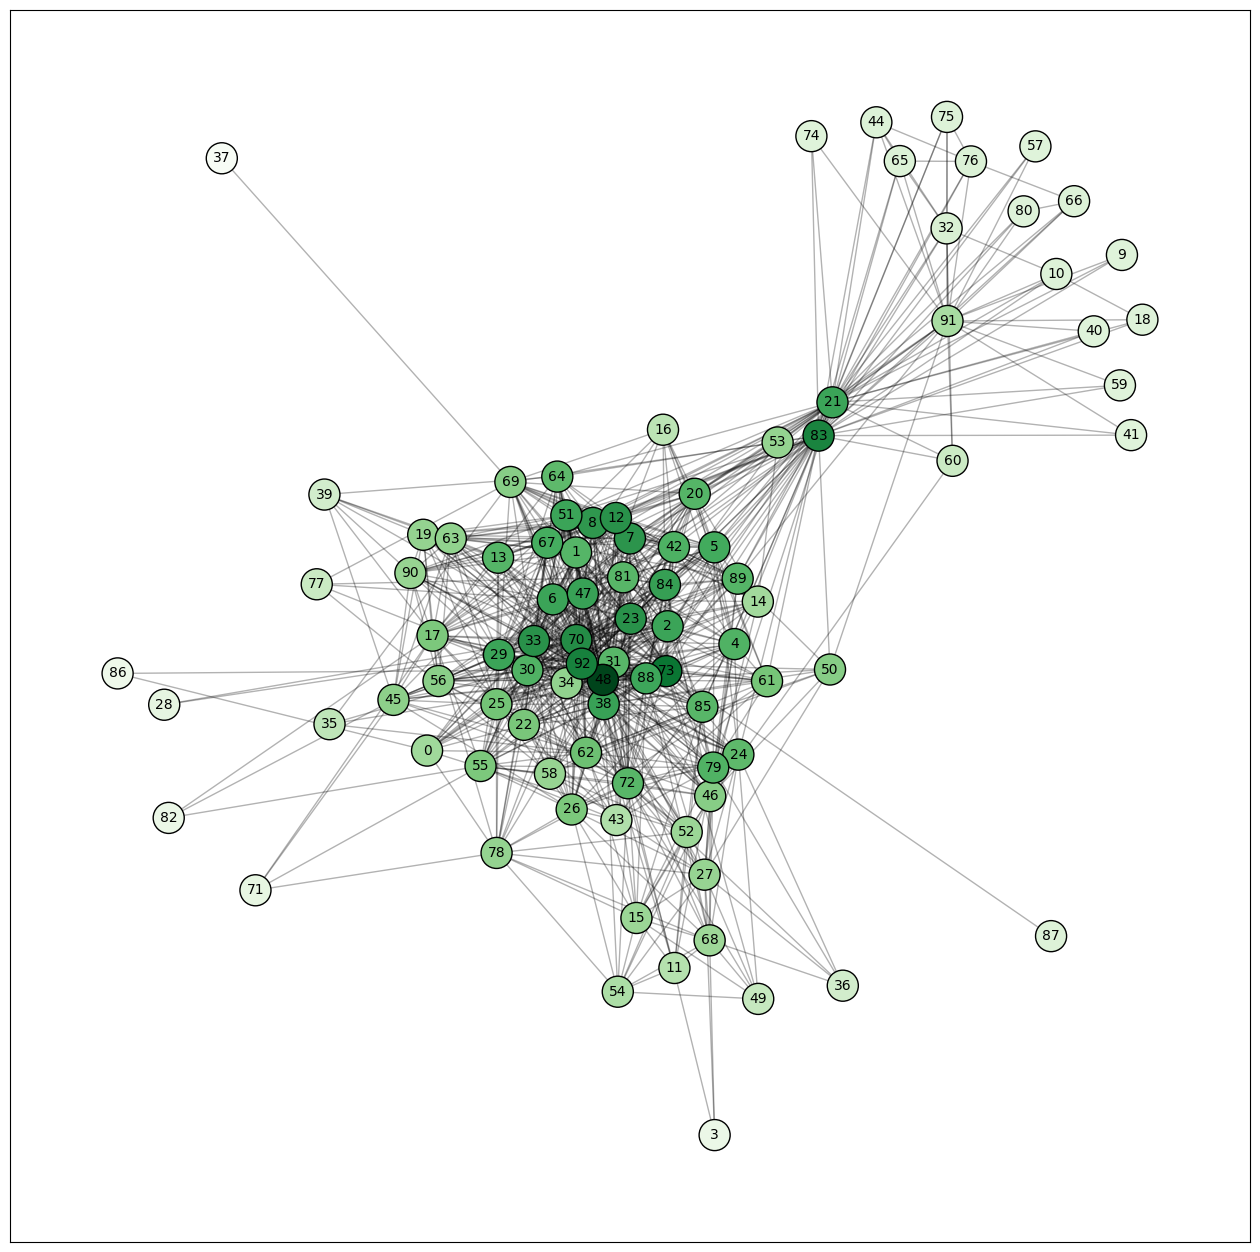

In [30]:
# Plot the graph with node colors based on betweenness centrality
pos = nx.spring_layout(G_sample)

# Plot the graph with node colors based on closeness centrality
plt.figure(figsize=(16, 16))
nodes = nx.draw_networkx_nodes(G_sample, pos, node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, node_size=500, edgecolors='black')
edges = nx.draw_networkx_edges(G_sample, pos, alpha=0.3)
labels = nx.draw_networkx_labels(G_sample, pos, font_size=10, font_color="black")

sm = ScalarMappable(cmap=plt.cm.Greens)
sm.set_array([])  # Dummy array for ScalarMappable

plt.colorbar(sm, label="Closeness Centrality")
plt.title("Dense Sampled Graph with Node Colors based on Closeness Centrality")
plt.axis('off')
plt.savefig('Sample_Clos_Centrality.jpg')
plt.show()

<ipython-input-64-9ea079db31af>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Degree Centrality")


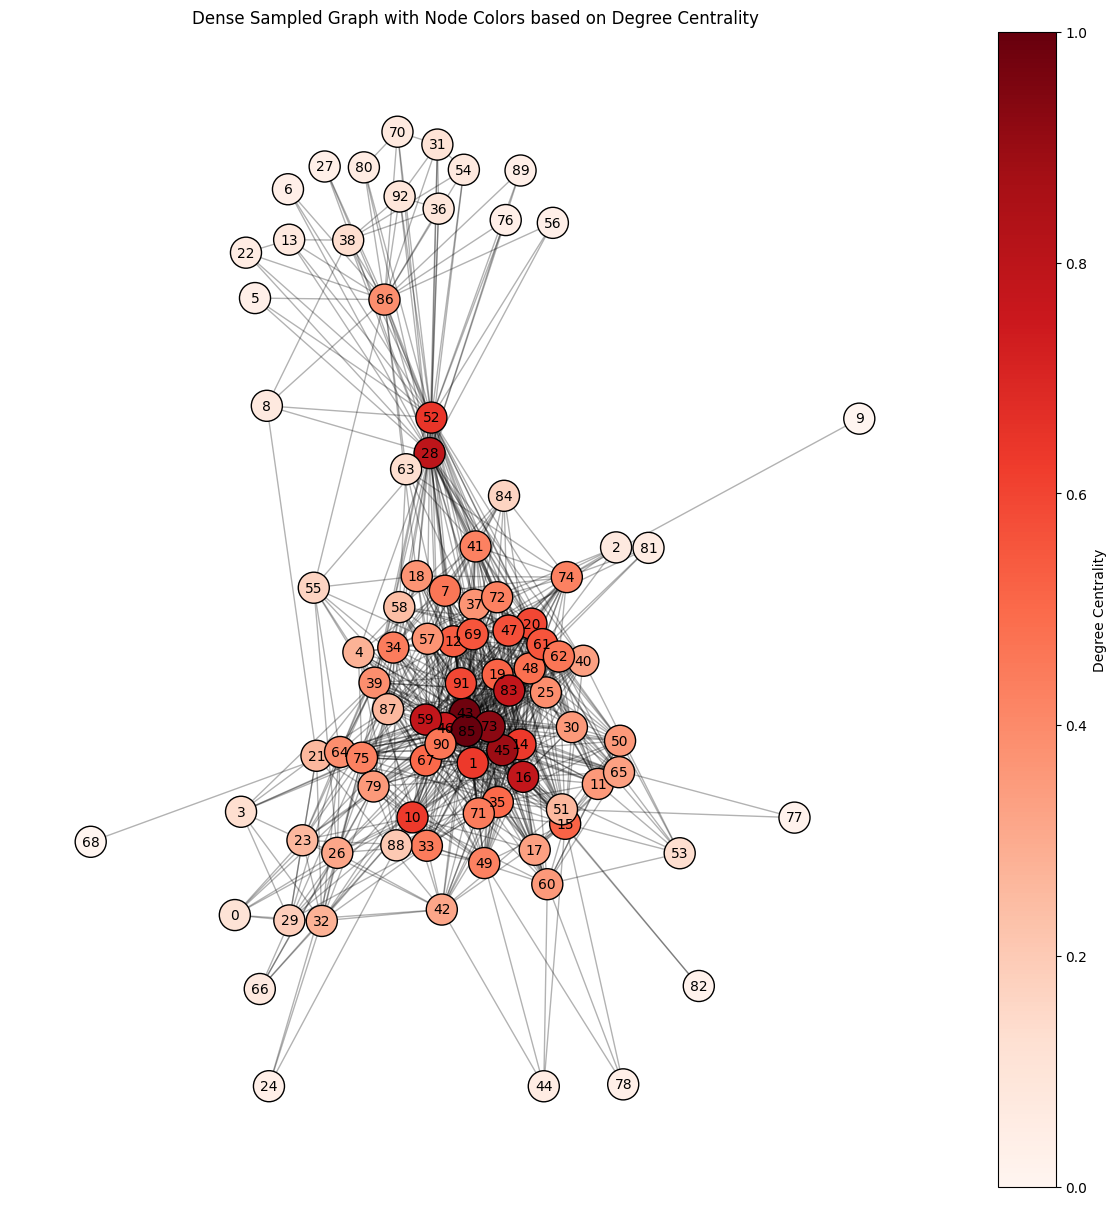

In [ ]:
# Plot the graph with node colors based on degree centrality
pos = nx.spring_layout(G_sample)
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_sample, pos, node_color=list(degree_centrality.values()), cmap=plt.cm.Reds, node_size=500, edgecolors='black')
edges = nx.draw_networkx_edges(G_sample, pos, alpha=0.3)
labels = nx.draw_networkx_labels(G_sample, pos, font_size=10, font_color="black")

sm = ScalarMappable(cmap=plt.cm.Reds)
sm.set_array([])  # Dummy array for ScalarMappable

plt.colorbar(sm, label="Degree Centrality")
plt.title("Dense Sampled Graph with Node Colors based on Degree Centrality")
plt.axis('off')
plt.savefig('Sample_Deg_Centrality.jpg')
plt.show()

In [37]:

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G_pruned)
betweenness_centrality = nx.betweenness_centrality(G_pruned)
closeness_centrality = nx.closeness_centrality(G_pruned)

# Get the top 10 nodes by each centrality measure
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Normalize the values
def normalize_centrality(centrality_list):
    values = [x[1] for x in centrality_list]
    min_val, max_val = min(values), max(values)
    return [(node, (value - min_val) / (max_val - min_val)) for node, value in centrality_list]

normalized_top_degree = normalize_centrality(top_degree)
normalized_top_betweenness = normalize_centrality(top_betweenness)
normalized_top_closeness = normalize_centrality(top_closeness)

# Print the results
print("Top 10 nodes by normalized Degree Centrality:")
for node, centrality in normalized_top_degree:
    print(f"Node: {node}, Normalized Degree Centrality: {centrality:.4f}")

print("\nTop 10 nodes by normalized Betweenness Centrality:")
for node, centrality in normalized_top_betweenness:
    print(f"Node: {node}, Normalized Betweenness Centrality: {centrality:.4f}")

print("\nTop 10 nodes by normalized Closeness Centrality:")
for node, centrality in normalized_top_closeness:
    print(f"Node: {node}, Normalized Closeness Centrality: {centrality:.4f}")


Top 10 nodes by normalized Degree Centrality:
Node: UP26cYNMSZ4, Normalized Degree Centrality: 1.0000
Node: VajEefVyFu4, Normalized Degree Centrality: 1.0000
Node: 9ACpEO8BxNw, Normalized Degree Centrality: 0.9167
Node: _GhJ2DlCpI0, Normalized Degree Centrality: 0.6667
Node: 5xeTHEbbeWg, Normalized Degree Centrality: 0.5000
Node: nOk-en7EqpI, Normalized Degree Centrality: 0.4167
Node: Suh83FZlblg, Normalized Degree Centrality: 0.0833
Node: KoDB7kXyjJ4, Normalized Degree Centrality: 0.0000
Node: 2rUgZv1mZPc, Normalized Degree Centrality: 0.0000
Node: 82w2gdq6E-0, Normalized Degree Centrality: 0.0000

Top 10 nodes by normalized Betweenness Centrality:
Node: bUQ-az3wCSE, Normalized Betweenness Centrality: 1.0000
Node: s9b67PaGBIc, Normalized Betweenness Centrality: 0.2818
Node: -qKO49hurr4, Normalized Betweenness Centrality: 0.1530
Node: SwLsbj8P3Hc, Normalized Betweenness Centrality: 0.0997
Node: 55OyD01fTT4, Normalized Betweenness Centrality: 0.0504
Node: Es9de9TsGFE, Normalized Between

##Shortest path distribution (shortest path vs number of node pairs)##

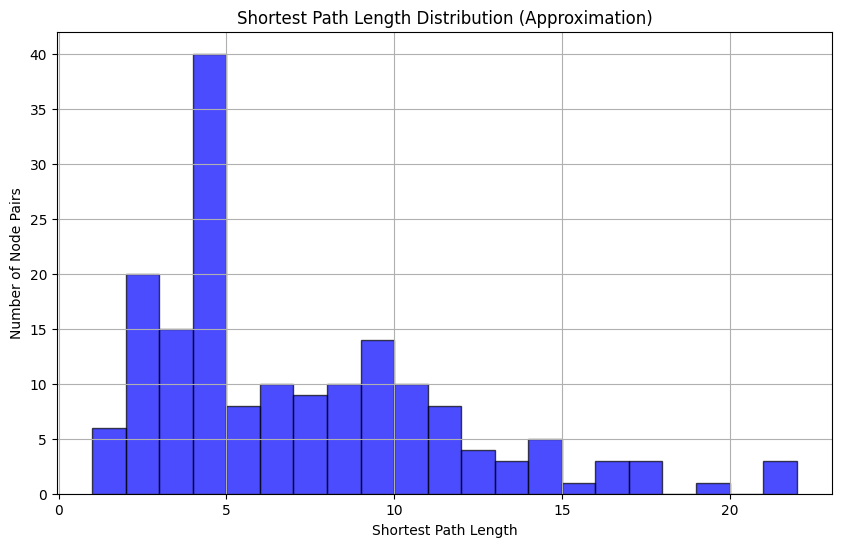

In [38]:
# Function to approximate shortest path length distribution
def approximate_shortest_path_distribution(G, num_samples=10000):
    nodes = list(G.nodes())
    path_lengths = []

    for _ in range(num_samples):
        source = random.choice(nodes)
        target = random.choice(nodes)
        if source != target and nx.has_path(G, source, target):
            length = nx.shortest_path_length(G, source=source, target=target)
            path_lengths.append(length)

    return path_lengths

# Approximate shortest path length distribution
num_samples = 10000
path_lengths = approximate_shortest_path_distribution(G_pruned, num_samples)

# Create a histogram of shortest path lengths
plt.figure(figsize=(10, 6))
plt.hist(path_lengths, bins=np.arange(min(path_lengths), max(path_lengths) + 1, 1), alpha=0.7, color='b', edgecolor='black')
plt.title('Shortest Path Length Distribution (Approximation)')
plt.xlabel('Shortest Path Length')
plt.ylabel('Number of Node Pairs')
plt.grid(True)
plt.savefig('Shortest_Path.jpg')
plt.show()

##Link Prediction##

## Simple Random Walk vs Pixie Random Walk  using train-test-eval split 80-10-10##

In [57]:
# set seed in order to reproduce results
random.seed(100)

In [58]:
# 80-10-10 split
def split_edges(G, eval_fraction=0.10, test_fraction=0.10):
    G_train = G.copy()
    #list  eval,test links
    eval_edges = []
    test_edges = []

    # debugging edges that cannot be removed
    unable_to_remove_eval = []
    unable_to_remove_test = []

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if len(neighbors) < 2:
            continue

        num_eval = int(len(neighbors) * eval_fraction)
        num_test = int(len(neighbors) * test_fraction)

        random.shuffle(neighbors)

        eval_neighbors = neighbors[:num_eval]
        test_neighbors = neighbors[num_eval:num_eval + num_test]

        for neighbor in eval_neighbors:
            try:
                eval_edges.append((node, neighbor))
                G_train.remove_edge(node, neighbor)
            except nx.NetworkXError:
                unable_to_remove_eval.append((node, neighbor))

        for neighbor in test_neighbors:
            try:
                test_edges.append((node, neighbor))
                G_train.remove_edge(node, neighbor)
            except nx.NetworkXError:
                unable_to_remove_test.append((node, neighbor))

    print("Unable to remove evaluation edges:", unable_to_remove_eval)
    print("Unable to remove test edges:", unable_to_remove_test)

    return G_train, eval_edges, test_edges

# Split akmes
G_train, eval_edges, test_edges = split_edges(G_pruned)

print("Training Graph - Nodes:", len(G_train.nodes()), "Edges:", len(G_train.edges()))
print("Evaluation Edges:", len(eval_edges))
print("Test Edges:", len(test_edges))

Unable to remove evaluation edges: [('MGuM2DbO7mQ', 'ivBAS_PHv8I'), ('RptahXsLNaw', 'hyiWZi_xrfc'), ('hgVtD0eHBGk', 'QPrOlVRynxw'), ('Gm3kw5GPEGE', 'fi3NYnXbRVY'), ('w_SitLi1J9o', 'UP26cYNMSZ4'), ('RbRZ0YB9N2c', 'A_1vdTOsX8c'), ('MJKZRBdkXq0', 'nOk-en7EqpI'), ('C_sZU8xJy_o', '2kIThcu4fko'), ('VJdEdAmU5d4', 'MGuM2DbO7mQ'), ('IpObYiDjmHw', '7qBN1IuunTc'), ('4sBOQOYzaP4', '89_JnR2coDw'), ('Eiu3nub023c', 'suogAdRCntg'), ('ChUq5lmkLnM', 'KoDB7kXyjJ4'), ('LKLQc3RJFzg', '9oOnLBrKRi4'), ('VajEefVyFu4', '1JSChKV5N6w'), ('XEwqnkNEbVA', 'oIqljaEudRU'), ('Qq_mQ7MxU3M', 'X9yk0MsfUHs'), ('1Cor07pcsPs', 'uTU8KBH4zDI'), ('HKjj9y1VKyI', '7p3msFNo46M'), ('06fYqkcxODs', 'fPCtCa3MXB8'), ('PSZNuNDqRnc', 'qvrWiK-4S6Q'), ('CA-gPwFXGcE', 'NyEyveRkxJs'), ('vqZBcfyTCPA', '2v3-p-8UiRo'), ('hCuS6f-LsQ4', 'lmePt4pTFU0'), ('dofc7-4ymLE', 'InBuAEJ3V3Q'), ('FnSjlk18ytI', 'sXoaBxSB744'), ('nYcgKmFphTk', 'IWSeGjoedP8'), ('EIpr5KY4wWA', 'mDlw1GTTn30'), ('vzK_ii1ccmE', '2kIThcu4fko'), ('NOgmcMD_IvA', 'nZvmxNyVtuE'), ('61

In [59]:


# Simple random walk
def simple_random_walk(G, start_node, num_steps):
    current_node = start_node
    walk = [current_node]

    for _ in range(num_steps):
        neighbors = list(G.neighbors(current_node))
        if not neighbors:
            break
        current_node = random.choice(neighbors)
        walk.append(current_node)

    return walk

# Pixie Random Walk - the difference is that we have weights based on the neighbors and put also biases as extra
def pixie_random_walk(G, start_node, num_steps, alpha=0.2, biases=None):
    current_node = start_node
    walk = [current_node]

    for _ in range(num_steps):
        neighbors = list(G.neighbors(current_node))
        if not neighbors:
            break

        if biases:
            weights = np.ones(len(neighbors))
            if biases.get("uploader"):
                weights = [1.5 if G.nodes[neighbor].get('uploader') == G.nodes[current_node].get('uploader') else 1.0 for neighbor in neighbors]
            if biases.get("genre"):
                weights = [1.5 if G.nodes[neighbor].get('genre') == G.nodes[current_node].get('genre') else 1.0 for neighbor in neighbors]
            if biases.get("combined"):
                weights = [1.75 if (G.nodes[neighbor].get('uploader') == G.nodes[current_node].get('uploader') and G.nodes[neighbor].get('genre') == G.nodes[current_node].get('genre')) else weight for weight, neighbor in zip(weights, neighbors)]
            probs = np.array(weights) / sum(weights)
            next_node = np.random.choice(neighbors, p=probs)
        else:
            next_node = random.choice(neighbors)

        walk.append(next_node)
        current_node = next_node

    return walk

# Perfom the Walks
def perform_random_walks(G, num_walks, num_steps, walk_type="simple", biases=None):
    all_walks = []
    nodes = list(G.nodes())
    for _ in range(num_walks):
        start_node = random.choice(nodes)
        if walk_type == "simple":
            walk = simple_random_walk(G, start_node, num_steps)
        elif walk_type == "pixie":
            walk = pixie_random_walk(G, start_node, num_steps, biases=biases)
        all_walks.append(walk)
    return all_walks


In [60]:
# Parameters to try
num_walks = 250
num_steps = 2000

# Random walks
simple_walks = perform_random_walks(G_train, num_walks, num_steps, walk_type="simple")
pixie_walks = perform_random_walks(G_train, num_walks, num_steps, walk_type="pixie")
pixie_walks_uploader = perform_random_walks(G_train, num_walks, num_steps, walk_type="pixie", biases={"uploader": True})
pixie_walks_genre = perform_random_walks(G_train, num_walks, num_steps, walk_type="pixie", biases={"genre": True})
pixie_walks_combined = perform_random_walks(G_train, num_walks, num_steps, walk_type="pixie", biases={"combined": True})

# Visit counts all together
def aggregate_visit_counts(walks):
    visit_counts = {}
    for walk in walks:
        for node in walk:
            if node not in visit_counts:
                visit_counts[node] = 0
            visit_counts[node] += 1
    return visit_counts

simple_visit_counts = aggregate_visit_counts(simple_walks)
pixie_visit_counts = aggregate_visit_counts(pixie_walks)
pixie_visit_counts_uploader = aggregate_visit_counts(pixie_walks_uploader)
pixie_visit_counts_genre = aggregate_visit_counts(pixie_walks_genre)
pixie_visit_counts_combined = aggregate_visit_counts(pixie_walks_combined)

In [61]:


# Sort nodes by visit counts
sorted_simple = sorted(simple_visit_counts.items(), key=lambda x: x[1], reverse=True)
sorted_pixie = sorted(pixie_visit_counts.items(), key=lambda x: x[1], reverse=True)
sorted_pixie_uploader = sorted(pixie_visit_counts_uploader.items(),key=lambda x: x[1], reverse=True)
sorted_pixie_genre = sorted(pixie_visit_counts_genre.items(),key=lambda x: x[1], reverse=True)
sorted_pixie_combined =  sorted(pixie_visit_counts_combined.items(),key=lambda x: x[1], reverse=True)



In [62]:
# top 10 influential nodes for each random walk type
top_10_simple = sorted_simple[:10]
top_10_pixie = sorted_pixie[:10]
top_10_pixie_uploader = sorted_pixie_uploader[:10]
top_10_pixie_genre = sorted_pixie_genre[:10]
top_10_pixie_combined = sorted_pixie_combined[:10]

# Dataframe the top 10 inflential nodes for each type of walk
# Create a DataFrame to hold the top 10 influential nodes
data = {
    "Simple Random Walk": [node[0] for node in top_10_simple],
    "Simple RW Score": [node[1] for node in top_10_simple],
    "Pixie Random Walk": [node[0] for node in top_10_pixie],
    "Pixie RW Score": [node[1] for node in top_10_pixie],
    "Pixie RW Uploader Bias": [node[0] for node in top_10_pixie_uploader],
    "Uploader RW Score": [node[1] for node in top_10_pixie_uploader],
    "Pixie RW Genre Bias": [node[0] for node in top_10_pixie_genre],
    "Genre RW Score": [node[1] for node in top_10_pixie_genre],
    "Pixie RW Combined": [node[0] for node in top_10_pixie_combined],
    "Combined RW Score": [node[1] for node in top_10_pixie_combined]
}

df_top_10_influential = pd.DataFrame(data)

# Display the DataFrame
display(df_top_10_influential)


,Simple Random Walk,Simple RW Score,Pixie Random Walk,Pixie RW Score,Pixie RW Uploader Bias,Uploader RW Score,Pixie RW Genre Bias,Genre RW Score,Pixie RW Combined,Combined RW Score
0,o2Cijr4Gqc4,1845,6dlDE72Wks0,2000,WnO-kJWuDdQ,2528,9pjABg1GHS0,2563,yilYSm2YDAw,2001
1,QFlBP75BRzs,1766,2uZ9jrZGz5U,2000,vFYrxXgBgqc,1748,W7qTKDaMdgc,2000,UazXN3SQ9-g,1845
2,FrFptDxxMDI,1716,3CbxJUxVLlM,2000,qfzvcdaXtwc,1621,EjTBmWCuRqc,1420,qo-iyeWqKns,1554
3,QDibo_nmiDM,1701,OGuJEpZ2Qac,1210,aqm87UWX760,1468,LoGsW694k8s,1170,0oxDhDX3cKw,1397
4,9pjABg1GHS0,1671,_ai97oIOP1Y,1101,AyqC4XrLBWw,1443,dKu9VtACFVg,1074,bJFG6Bfb8aw,1377
5,XfnUSnTzaPY,1006,dt9wZloG97U,1001,CGaPt8jV_kA,1391,DK2grNcKCns,1026,eCzqX4KuwAU,1076
6,GElpKyGfDII,1001,ESxvY1tQHTo,1000,eCzqX4KuwAU,1099,62VszMwcgoM,1001,uBVZ7LegZOQ,1060
7,RpjHSiQLPmA,1000,1yCBwudPLyc,1000,dKu9VtACFVg,1058,zCjjRojZj7U,1000,FJP2oSD4plA,1013
8,Ka6l_jcHMZU,1000,sC2V_SP8CVY,1000,5V9jem8ACQA,1004,Ei7ZpB6z2Aw,1000,xBSiLbmHlUM,1000
9,xOlJuvbmk6Q,1000,pSgk1JzCqSY,1000,Xpe8-LYabS0,1001,6dlDE72Wks0,1000,Ei7ZpB6z2Aw,1000


In [63]:
# Rank visited nodes
def rank_visited_nodes(visit_counts):
    sorted_nodes = sorted(visit_counts.items(), key=lambda x: x[1], reverse=True)
    ranked_nodes = [node for node, count in sorted_nodes]
    return ranked_nodes

ranked_nodes_simple = rank_visited_nodes(simple_visit_counts)
ranked_nodes_pixie = rank_visited_nodes(pixie_visit_counts)
ranked_nodes_pixie_uploader = rank_visited_nodes(pixie_visit_counts_uploader)
ranked_nodes_pixie_genre = rank_visited_nodes(pixie_visit_counts_genre)
ranked_nodes_pixie_combined = rank_visited_nodes(pixie_visit_counts_combined)



In [64]:
# Evaluate Visit Counts
def evaluate_visit_counts(G, visit_counts, eval_edges, test_edges):
    sorted_nodes = sorted(visit_counts.items(), key=lambda x: x[1], reverse=True)
    ranked_nodes = [node for node, count in sorted_nodes]

    true_positive_eval = len([edge for edge in eval_edges if edge[0] in ranked_nodes and edge[1] in ranked_nodes])
    false_positive_eval = len(ranked_nodes) - true_positive_eval
    false_negative_eval = len([edge for edge in eval_edges if edge[0] not in ranked_nodes or edge[1] not in ranked_nodes])

    true_positive_test = len([edge for edge in test_edges if edge[0] in ranked_nodes and edge[1] in ranked_nodes])
    false_positive_test = len(ranked_nodes) - true_positive_test
    false_negative_test = len([edge for edge in test_edges if edge[0] not in ranked_nodes or edge[1] not in ranked_nodes])

    precision_eval = true_positive_eval / (true_positive_eval + false_positive_eval) if true_positive_eval + false_positive_eval > 0 else 0
    recall_eval = true_positive_eval / (true_positive_eval + false_negative_eval) if true_positive_eval + false_negative_eval > 0 else 0
    f1_score_eval = 2 * (precision_eval * recall_eval) / (precision_eval + recall_eval) if precision_eval + recall_eval > 0 else 0
    accuracy_eval = true_positive_eval / len(eval_edges) if len(eval_edges) > 0 else 0

    precision_test = true_positive_test / (true_positive_test + false_positive_test) if true_positive_test + false_positive_test > 0 else 0
    recall_test = true_positive_test / (true_positive_test + false_negative_test) if true_positive_test + false_negative_test > 0 else 0
    f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if precision_test + recall_test > 0 else 0
    accuracy_test = true_positive_test / len(test_edges) if len(test_edges) > 0 else 0

    results_eval = {
        'precision': precision_eval,
        'recall': recall_eval,
        'f1_score': f1_score_eval,
        'accuracy': accuracy_eval
    }

    results_test = {
        'precision': precision_test,
        'recall': recall_test,
        'f1_score': f1_score_test,
        'accuracy': accuracy_test
    }

    return results_eval, results_test

# Evaluate visit counts
results_simple_eval, results_simple_test = evaluate_visit_counts(G_train, simple_visit_counts, eval_edges, test_edges)
results_pixie_eval, results_pixie_test = evaluate_visit_counts(G_train, pixie_visit_counts, eval_edges, test_edges)

# Print results
print("Evaluation Results - Simple Random Walk:", results_simple_eval)
print("Test Results - Simple Random Walk:", results_simple_test)
print("Evaluation Results - Pixie Random Walk:", results_pixie_eval)
print("Test Results - Pixie Random Walk:", results_pixie_test)


Evaluation Results - Simple Random Walk: {'precision': 0.20821155184411969, 'recall': 0.6619469026548672, 'f1_score': 0.3167813658020116, 'accuracy': 0.6619469026548672}
Test Results - Simple Random Walk: {'precision': 0.21029923451635352, 'recall': 0.6685840707964602, 'f1_score': 0.3199576495500264, 'accuracy': 0.6685840707964602}
Evaluation Results - Pixie Random Walk: {'precision': 0.20609462710505214, 'recall': 0.6823008849557523, 'f1_score': 0.3165674399507288, 'accuracy': 0.6823008849557523}
Test Results - Pixie Random Walk: {'precision': 0.20809943865276664, 'recall': 0.6889380530973451, 'f1_score': 0.319646889755697, 'accuracy': 0.6889380530973451}


In [65]:
# Evaluate visit counts
results_simple_eval, results_simple_test = evaluate_visit_counts(G_train, simple_visit_counts, eval_edges, test_edges)
results_pixie_uploader_eval, results_pixie_uploader_test = evaluate_visit_counts(G_train, pixie_visit_counts_uploader, eval_edges, test_edges)
results_pixie_genre_eval, results_pixie_genre_test = evaluate_visit_counts(G_train, pixie_visit_counts_genre, eval_edges, test_edges)
results_pixie_comb_eval, results_pixie_comb_test = evaluate_visit_counts(G_train, pixie_visit_counts_combined,eval_edges, test_edges)


# Function to convert results to DataFrame
def results_to_dataframe(results_eval, results_test, walk_type):
    data = [
        ['Evaluation', results_eval['precision'], results_eval['recall'], results_eval['f1_score'], results_eval['accuracy']],
        ['Test', results_test['precision'], results_test['recall'], results_test['f1_score'], results_test['accuracy']]
    ]
    df = pd.DataFrame(data, columns=['Set', 'Precision', 'Recall', 'F1-Score', 'Accuracy'])
    df['Walk Type'] = walk_type
    return df

# Results to DataFrames
df_simple = results_to_dataframe(results_simple_eval, results_simple_test, "Simple Random Walk")
df_pixie_uploader = results_to_dataframe(results_pixie_uploader_eval, results_pixie_uploader_test, "Pixie Random Walk (Uploader Bias)")
df_pixie_genre = results_to_dataframe(results_pixie_genre_eval, results_pixie_genre_test, "Pixie Random Walk (Genre Bias)")
df_pixie_combined = results_to_dataframe(results_pixie_comb_eval, results_pixie_comb_test, "Pixie Random Walk (Combined Bias)")

# Combine all results into a single DataFrame
df_results = pd.concat([df_simple, df_pixie_uploader, df_pixie_genre,df_pixie_combined], ignore_index=True)

# Display the result
display(df_results)


,Set,Precision,Recall,F1-Score,Accuracy,Walk Type
0,Evaluation,0.208212,0.661947,0.316781,0.661947,Simple Random Walk
1,Test,0.210299,0.668584,0.319958,0.668584,Simple Random Walk
2,Evaluation,0.217993,0.752655,0.338070,0.752655,Pixie Random Walk (Uploader Bias)
3,Test,0.220941,0.762832,0.342641,0.762832,Pixie Random Walk (Uploader Bias)
4,Evaluation,0.207051,0.693805,0.318926,0.693805,Pixie Random Walk (Genre Bias)
5,Test,0.208372,0.698230,0.320960,0.698230,Pixie Random Walk (Genre Bias)
6,Evaluation,0.176997,0.595133,0.272847,0.595133,Pixie Random Walk (Combined Bias)
7,Test,0.180287,0.606195,0.277919,0.606195,Pixie Random Walk (Combined Bias)
